<a href="https://colab.research.google.com/github/rsy124/VOIS_AICTE_Oct2025_Rutuja-Yadav/blob/main/Rutuja_Yadav_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('/content/Netflix Dataset (1).csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


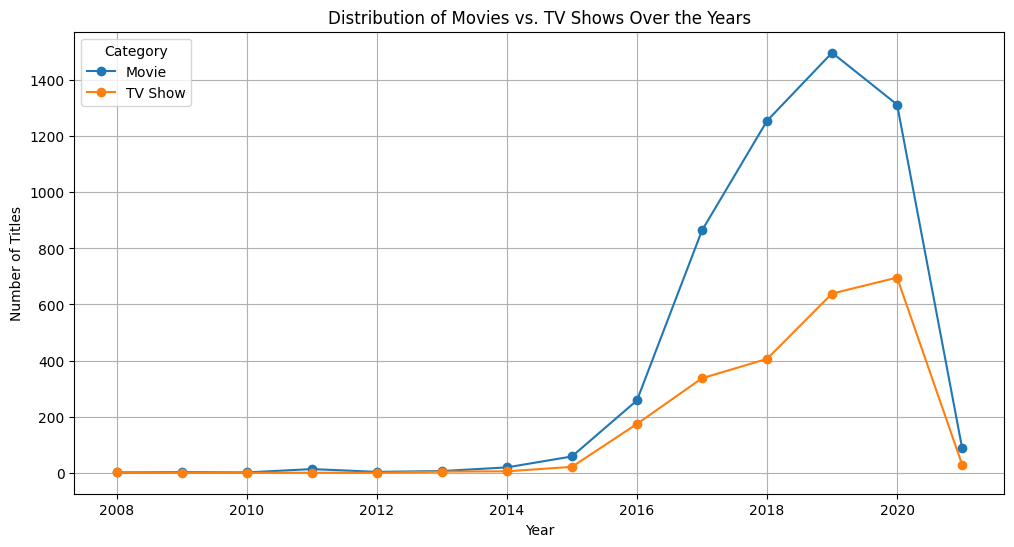

In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

content_type_by_year = df.groupby(['Year', 'Category']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
content_type_by_year.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Distribution of Movies vs. TV Shows Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Category')
plt.grid(True)
plt.show()

### Compare Country-wise Contributions

Top 10 Countries with the Most Content:


,count
Country,
United States,2556
India,923
United Kingdom,397
Japan,226
South Korea,183
Canada,177
Spain,134
France,115
Egypt,101


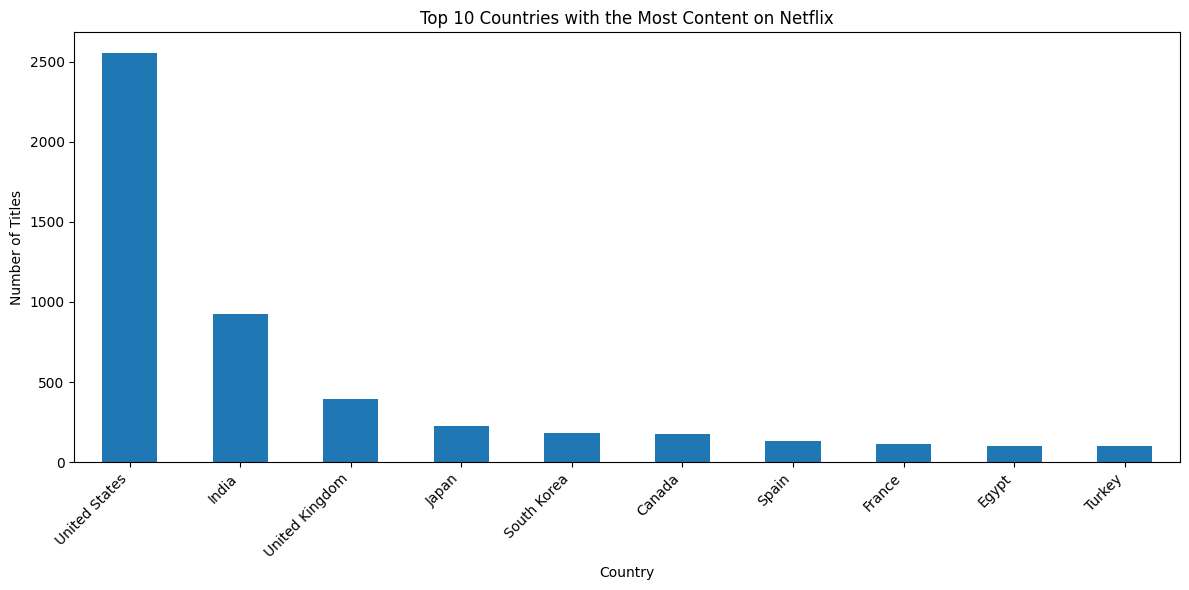

In [11]:
# Count the number of titles per country
country_counts = df['Country'].value_counts().head(10)

# Display the top 10 countries with the most content
print("Top 10 Countries with the Most Content:")
display(country_counts)

# Visualize the top 10 countries
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Top 10 Countries with the Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analyze Genre Popularity

In [12]:
# Split the 'Type' column into individual genres
genres = df['Type'].str.get_dummies(sep=',')

# Sum the occurrences of each genre
genre_counts = genres.sum().sort_values(ascending=False)

# Display the top 10 most common genres
print("Top 10 Most Common Genres:")
display(genre_counts.head(10))

Top 10 Most Common Genres:


,0
International Movies,2323
Dramas,1385
Comedies,1075
Documentaries,751
Dramas,723
Action & Adventure,721
International TV Shows,690
Independent Movies,655
TV Dramas,642
Romantic Movies,528
